In [10]:
import pandas as pd
import pickle
from scipy import stats
import seaborn as sns
from cliffs_delta import cliffs_delta

In [11]:
# load data
dropout = pickle.load(open("../00_data/final/dropout_per_session.pkl", "rb"))
dropout = dropout[["UserID", "dropout"]]
final = pickle.load(open("../00_data/final/competence.pkl", "rb"))

In [12]:
# define high and low performer (by ability)
n = 10
final = final.sort_values(by=["ability"])
low_performer = final.head(int(len(final) * (n / 100)))
final = final.sort_values(by=["ability"], ascending=False)
high_performer = final.head(int(len(final) * (n / 100)))

# merge
high_performer = pd.merge(high_performer, dropout, on="UserID", how="left")
low_performer = pd.merge(low_performer, dropout, on="UserID", how="left")

In [13]:
# split by interventiongroup
low_intvcontrol = low_performer[(low_performer["interventiongroup"] == "control")]
low_intv2 = low_performer[(low_performer["interventiongroup"] == "2")]
low_intv3 = low_performer[(low_performer["interventiongroup"] == "3")]
low_intv4 = low_performer[(low_performer["interventiongroup"] == "4")]
low_intv5 = low_performer[(low_performer["interventiongroup"] == "5")]
low_intv6 = low_performer[(low_performer["interventiongroup"] == "6")]

high_intvcontrol = high_performer[(high_performer["interventiongroup"] == "control")]
high_intv2 = high_performer[(high_performer["interventiongroup"] == "2")]
high_intv3 = high_performer[(high_performer["interventiongroup"] == "3")]
high_intv4 = high_performer[(high_performer["interventiongroup"] == "4")]
high_intv5 = high_performer[(high_performer["interventiongroup"] == "5")]
high_intv6 = high_performer[(high_performer["interventiongroup"] == "6")]

<AxesSubplot:xlabel='dropout', ylabel='Count'>

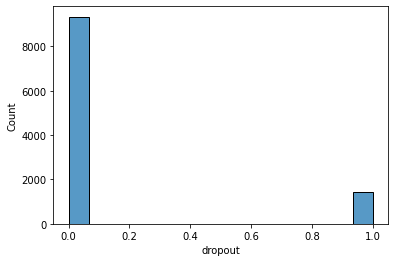

In [14]:
# plot high performer
sns.histplot(data=high_performer, x="dropout")

<AxesSubplot:xlabel='dropout', ylabel='Count'>

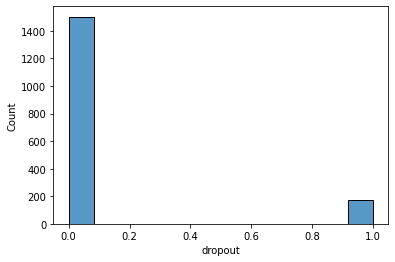

In [15]:
# plot low performer
sns.histplot(data=low_performer, x="dropout")

Get mean

In [16]:
# means high performer
dropout_by_group = high_performer.groupby(["interventiongroup"]).agg(
    {"dropout": "mean", "Geschlecht": "count"}
)
dropout_by_group = dropout_by_group.rename(columns={"Geschlecht": "count"})

In [17]:
# means low performer
dropout_by_group = low_performer.groupby(["interventiongroup"]).agg(
    {"dropout": "mean", "Geschlecht": "count"}
)
dropout_by_group = dropout_by_group.rename(columns={"Geschlecht": "count"})

Test significance

In [18]:
# Kruskal Wallis Test High Performer
stats.kruskal(
    high_intvcontrol["dropout"],
    high_intv2["dropout"],
    high_intv3["dropout"],
    high_intv4["dropout"],
    high_intv5["dropout"],
    high_intv6["dropout"],
)

KruskalResult(statistic=60.532208515986504, pvalue=9.43489929266464e-12)

In [19]:
# Kruskal Wallis Test Low Performer
stats.kruskal(
    low_intvcontrol["dropout"],
    low_intv2["dropout"],
    low_intv3["dropout"],
    low_intv4["dropout"],
    low_intv5["dropout"],
    low_intv6["dropout"],
)

KruskalResult(statistic=24.746392030987572, pvalue=0.0001559535749827188)

Wilcoxon Mann Whitney Tests and Cliffs Delta (# thresholds: .11 (small), .28 (medium), .43 (large))

Low performer

In [20]:
# control group
groups = [low_intv2, low_intv3, low_intv4, low_intv5, low_intv6]
for x in groups:
    print(stats.mannwhitneyu(low_intvcontrol["dropout"], x["dropout"]))
    print(cliffs_delta(low_intvcontrol["dropout"], x["dropout"])[0])

MannwhitneyuResult(statistic=35266.0, pvalue=0.07109596190932503)
-0.038680659670164916
MannwhitneyuResult(statistic=32495.0, pvalue=0.22079687564595896)
-0.025637181409295353
MannwhitneyuResult(statistic=33636.0, pvalue=0.005401185405140048)
-0.0646273637374861
MannwhitneyuResult(statistic=54567.0, pvalue=9.808815785635574e-06)
-0.10611843721844541
MannwhitneyuResult(statistic=31646.0, pvalue=0.006839830050777191)
-0.0633121207636525


In [21]:
# Intv 2
groups = [low_intv3, low_intv4, low_intv5, low_intv6]
for x in groups:
    print(stats.mannwhitneyu(low_intv2["dropout"], x["dropout"]))
    print(cliffs_delta(low_intv2["dropout"], x["dropout"])[0])

MannwhitneyuResult(statistic=29474.5, pvalue=0.6000993641635155)
0.013043478260869565
MannwhitneyuResult(statistic=30558.0, pvalue=0.3334475204523307)
-0.025946704067321177
MannwhitneyuResult(statistic=49665.0, pvalue=0.011529385977236102)
-0.0674377775482805
MannwhitneyuResult(statistic=28748.5, pvalue=0.3640366873488433)
-0.02463146109348759


In [22]:
# Intv 3
groups = [low_intv4, low_intv5, low_intv6]
for x in groups:
    print(stats.mannwhitneyu(low_intv3["dropout"], x["dropout"]))
    print(cliffs_delta(low_intv3["dropout"], x["dropout"])[0])

MannwhitneyuResult(statistic=27408.0, pvalue=0.14530244202530307)
-0.038990182328190744
MannwhitneyuResult(statistic=44518.5, pvalue=0.0031211701912044728)
-0.08048125580915005
MannwhitneyuResult(statistic=25785.5, pvalue=0.16324140192409964)
-0.03767493935435716


In [23]:
# Intv 4
print(stats.mannwhitneyu(low_intv4["dropout"], low_intv5["dropout"]))
print(cliffs_delta(low_intv4["dropout"], low_intv5["dropout"])[0])
print(stats.mannwhitneyu(low_intv4["dropout"], low_intv6["dropout"]))
print(cliffs_delta(low_intv4["dropout"], low_intv6["dropout"])[0])

MannwhitneyuResult(statistic=50038.0, pvalue=0.13445155334270387)
-0.04149107348095931
MannwhitneyuResult(statistic=28930.0, pvalue=0.9640945258526697)
0.0013152429738335872


In [24]:
# Intv 5
print(stats.mannwhitneyu(low_intv5["dropout"], low_intv6["dropout"]))
print(cliffs_delta(low_intv5["dropout"], low_intv6["dropout"])[0])

MannwhitneyuResult(statistic=51146.0, pvalue=0.13022108693981613)
0.0428063164547929


high performer

In [25]:
# control group
groups = [high_intv2, high_intv3, high_intv4, high_intv5, high_intv6]
for x in groups:
    print(stats.mannwhitneyu(high_intvcontrol["dropout"], x["dropout"]))
    print(cliffs_delta(high_intvcontrol["dropout"], x["dropout"])[0])

MannwhitneyuResult(statistic=2199405.0, pvalue=0.837897612616841)
-0.0020941275273982252
MannwhitneyuResult(statistic=2237768.5, pvalue=0.21781226256972763)
-0.012707957214683673
MannwhitneyuResult(statistic=1947304.0, pvalue=0.05055272613607949)
-0.021151784246673466
MannwhitneyuResult(statistic=1599363.5, pvalue=2.3266373542676825e-07)
-0.061190701971726484
MannwhitneyuResult(statistic=2092108.0, pvalue=0.0021297165529557587)
0.03066742369846159


In [26]:
# Intv 2
groups = [high_intv3, high_intv4, high_intv5, high_intv6]
for x in groups:
    print(stats.mannwhitneyu(high_intv2["dropout"], x["dropout"]))
    print(cliffs_delta(high_intv2["dropout"], x["dropout"])[0])

MannwhitneyuResult(statistic=1642804.5, pvalue=0.34179458223578785)
-0.010613829687285447
MannwhitneyuResult(statistic=1429593.0, pvalue=0.10269941923194541)
-0.01905765671927524
MannwhitneyuResult(statistic=1174263.0, pvalue=3.849006221777123e-06)
-0.05909657444432826
MannwhitneyuResult(statistic=1535734.5, pvalue=0.002077065845585965)
0.03276155122585982


In [27]:
# Intv 3
groups = [high_intv4, high_intv5, high_intv6]
for x in groups:
    print(stats.mannwhitneyu(high_intv3["dropout"], x["dropout"]))
    print(cliffs_delta(high_intv3["dropout"], x["dropout"])[0])

MannwhitneyuResult(statistic=1486073.0, pvalue=0.47425123912575895)
-0.008443827031989794
MannwhitneyuResult(statistic=1221211.5, pvalue=0.0001727748534946423)
-0.04848274475704281
MannwhitneyuResult(statistic=1595550.5, pvalue=6.024023993243029e-05)
0.043375380913145266


In [28]:
# Intv 4
print(stats.mannwhitneyu(high_intv4["dropout"], high_intv5["dropout"]))
print(cliffs_delta(high_intv4["dropout"], high_intv5["dropout"])[0])
print(stats.mannwhitneyu(high_intv4["dropout"], high_intv6["dropout"]))
print(cliffs_delta(high_intv4["dropout"], high_intv6["dropout"])[0])

MannwhitneyuResult(statistic=1081376.0, pvalue=0.0030115352500606086)
-0.04003891772505302
MannwhitneyuResult(statistic=1411757.0, pvalue=4.32878851549845e-06)
0.05181920794513506


In [29]:
# Intv 5
print(stats.mannwhitneyu(high_intv5["dropout"], high_intv6["dropout"]))
print(cliffs_delta(high_intv5["dropout"], high_intv6["dropout"])[0])

MannwhitneyuResult(statistic=1254979.0, pvalue=1.3561010406579304e-13)
0.09185812567018807
